In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import networkx as nx
import music21 as msc
from funciones import *

env = msc.environment.UserSettings()
#env['musicxmlPath'] = r'C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe' #Path a la aplicacion Finale
#env['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'          #Path a la aplicacion MuseScore 
#env['musicxmlPath']='/usr/bin/mscore'
msc.environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')
msc.environment.set('musicxmlPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')


In [ ]:
#---------------------------------------------------------------------
#Funciones:

# f_xml2graph (cancion, nombre_parte=0,modelo='melodia')
# graficar (G, color_map='rainbow',layout='espiral', labels=False)
# ql_2_fig (ql)
# f_motifs_rhytmic (cancion,length,nombre_parte=0)
# f_motifs_tonal (cancion,length,nombre_parte=0)
# f_grado_dist_M (G)
# f_grado_dist_H (G)
# f_tabla (G,nombre)
# f_xml2graph_armonia (cancion, index)
# f_armon (cancion, indexes)
# f_dist_escalas (cancion, nombre_parte=0):


In [3]:
#---------------------------------------------------------------------
#Empecemos con un analisis de un artista, lo pasamos a 2 y después lo pasamos a género
#Para clásica, usamos la base de datos de music21, para Bach son muchisimas asi que pruebo con Mozart que son 16 (tarda 1min)
from music21 import corpus
paths = corpus.getComposer('mozart')

#Creo los grafos que van a tener todas las voces de un artista y todos sus temas
M=nx.DiGraph()
R=nx.Graph()
H1=nx.DiGraph()
H2=nx.DiGraph()

for j in range(len(paths)):
    #veo la cantidad de elementos que tiene
    song = msc.converter.parse(paths[j])
    L=len(song.parts)
    for i in range(L):
        #Uno los grafos en uno para cada voz para melodia
        m=f_xml2graph(paths[j], nombre_parte=i, modelo='melodia');
        M=nx.compose(M,m)
        #Uno los grafos en uno para cada voz para ritmo
        r=f_xml2graph(paths[j], nombre_parte=i, modelo='ritmo');
        R=nx.compose(R,r)
        
        #Para la armonia mediante f_xml2graph_armonia (cancion, index)
        #h1=f_xml2graph_armonia(paths[j], i)
        #H1=nx.compose(H1,h1)
        #Para la armonia mediante f_armon (cancion, indexes)
        #h1=f_xml2graph_armonia(paths[j], i)
        #H1=nx.compose(H1,h1)


Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin I
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin I
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin II
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin II
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Viola
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Viola
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Cello
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Cello
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin I
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin I
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin II
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin II
Partes: ['Violin I', 'Vi

Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin I
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin II
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin II
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Viola
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Viola
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Cello
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Cello
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin I
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin I
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin II
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Violin II
Partes: ['Violin I', 'Violin II', 'Viola', 'Cello']. Parte seleccionada: Viola
Partes: ['Violin I', 'Violi

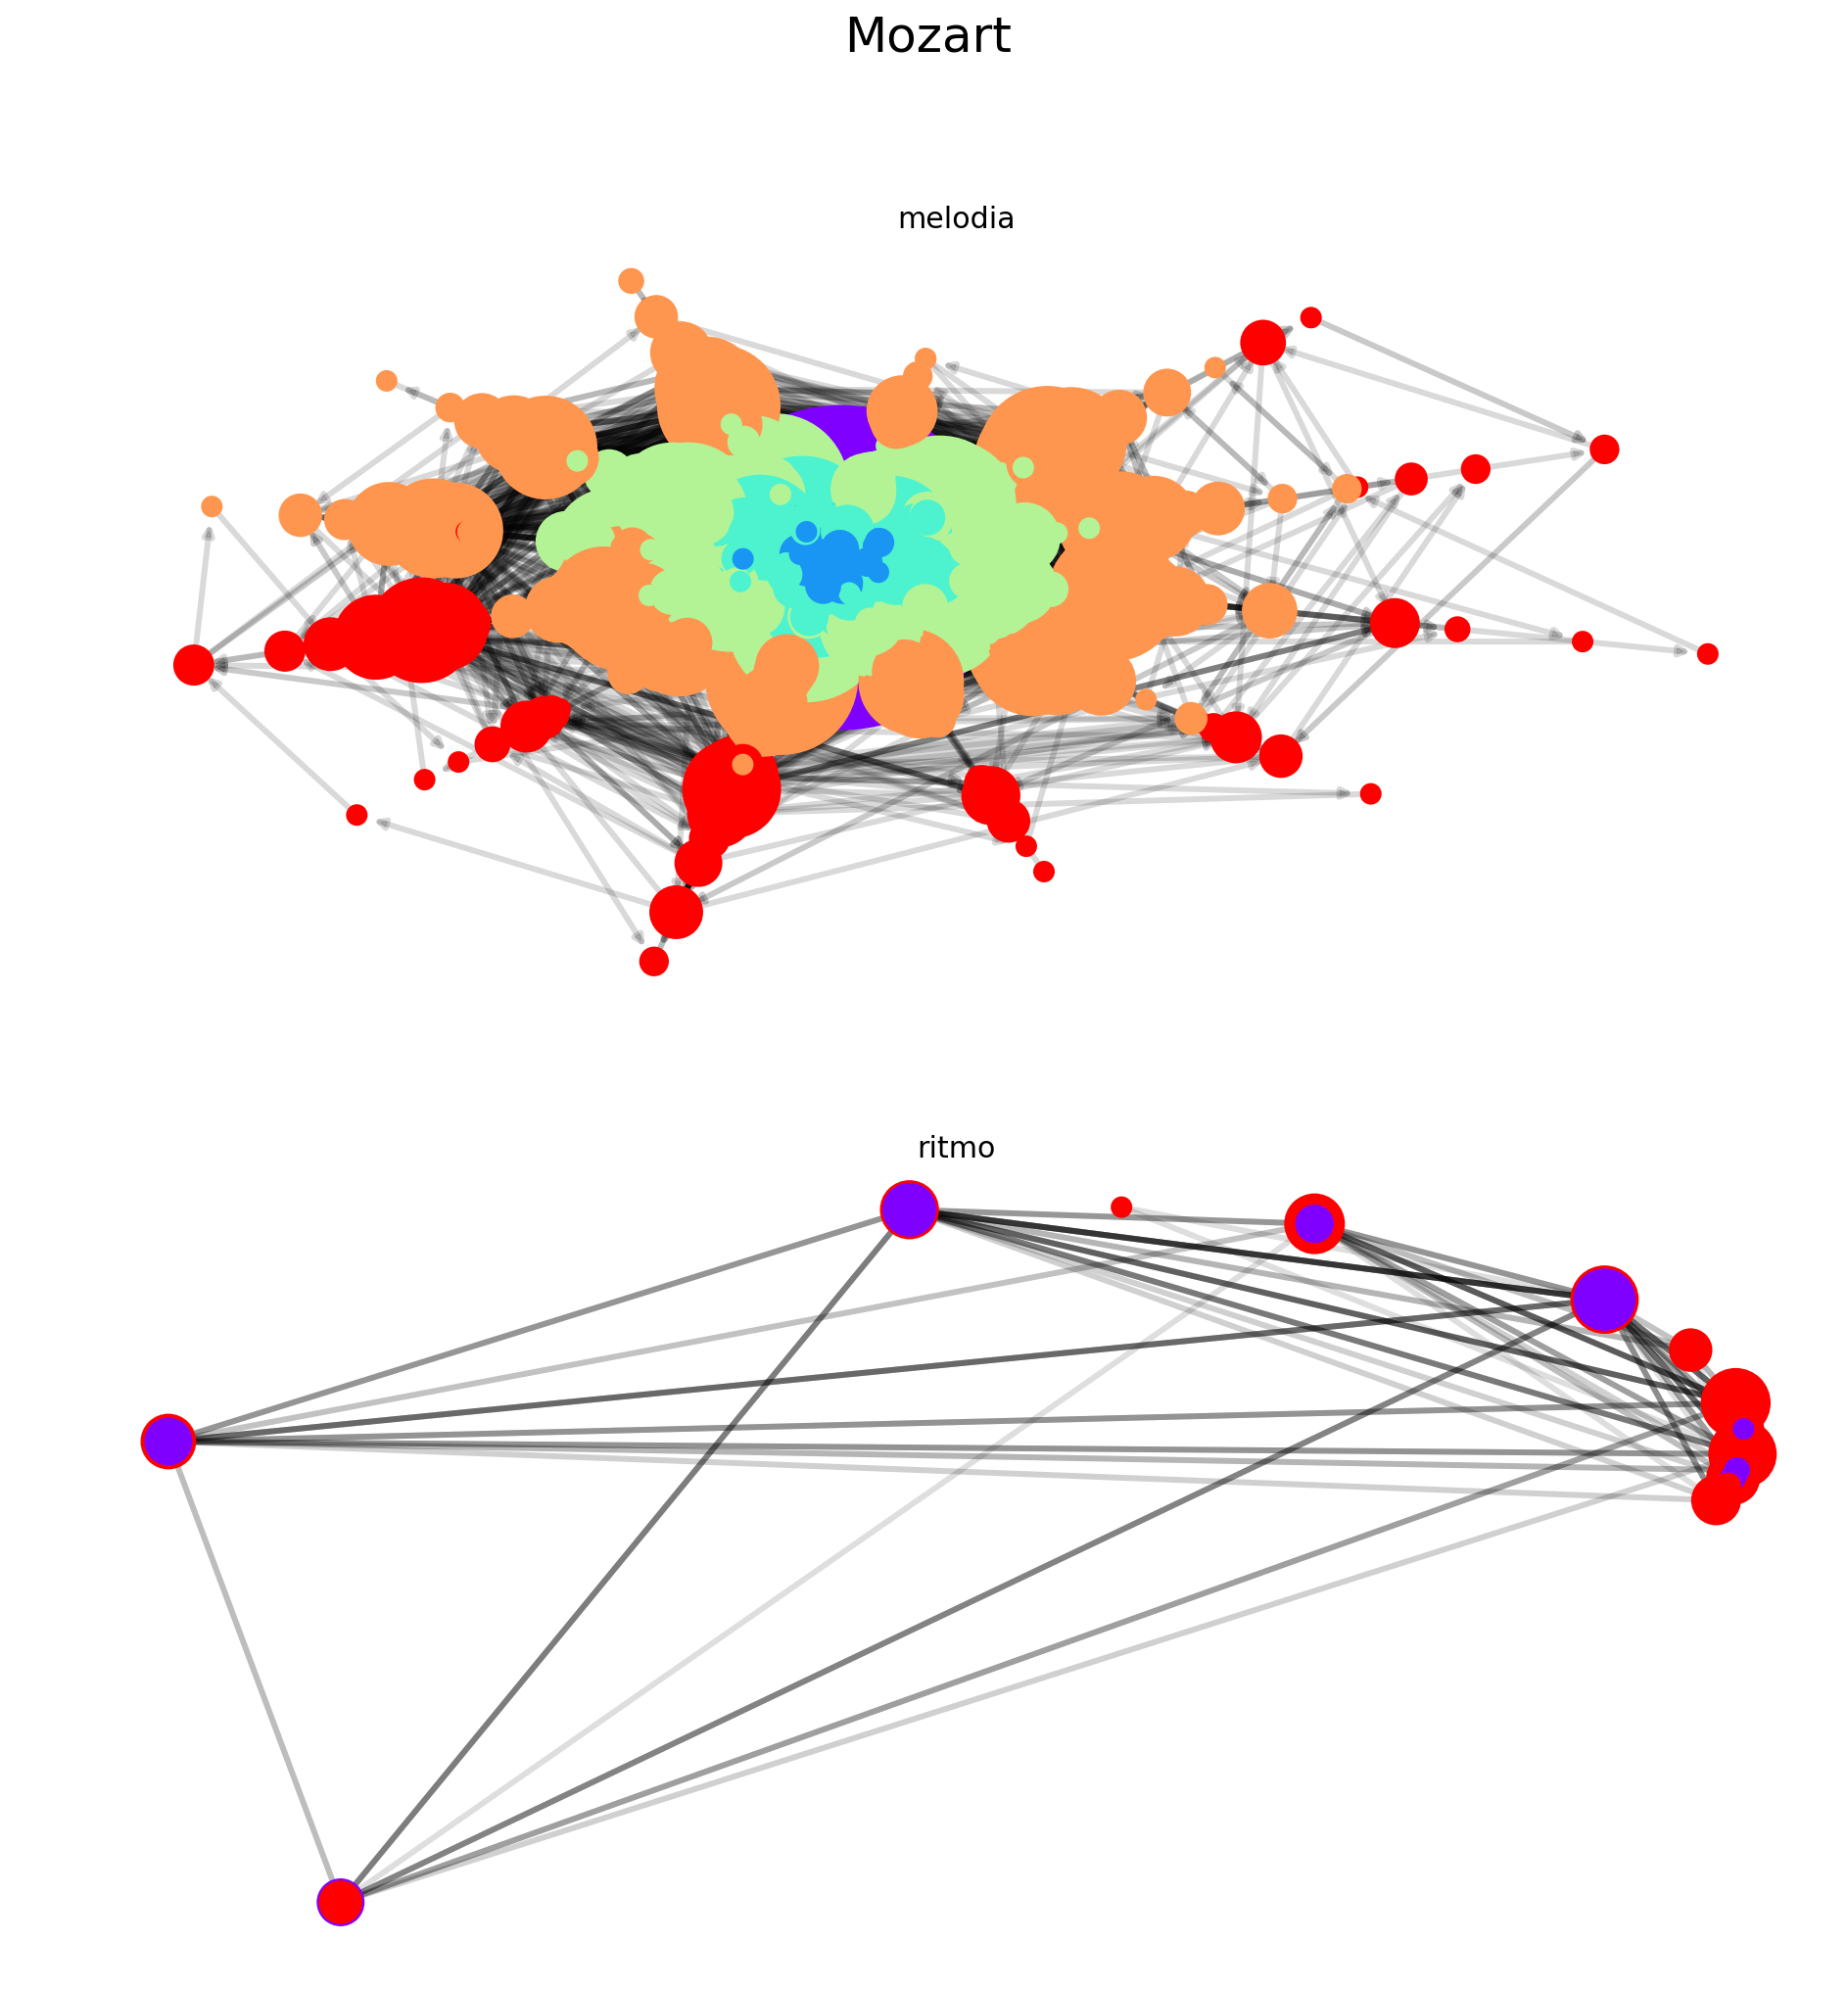

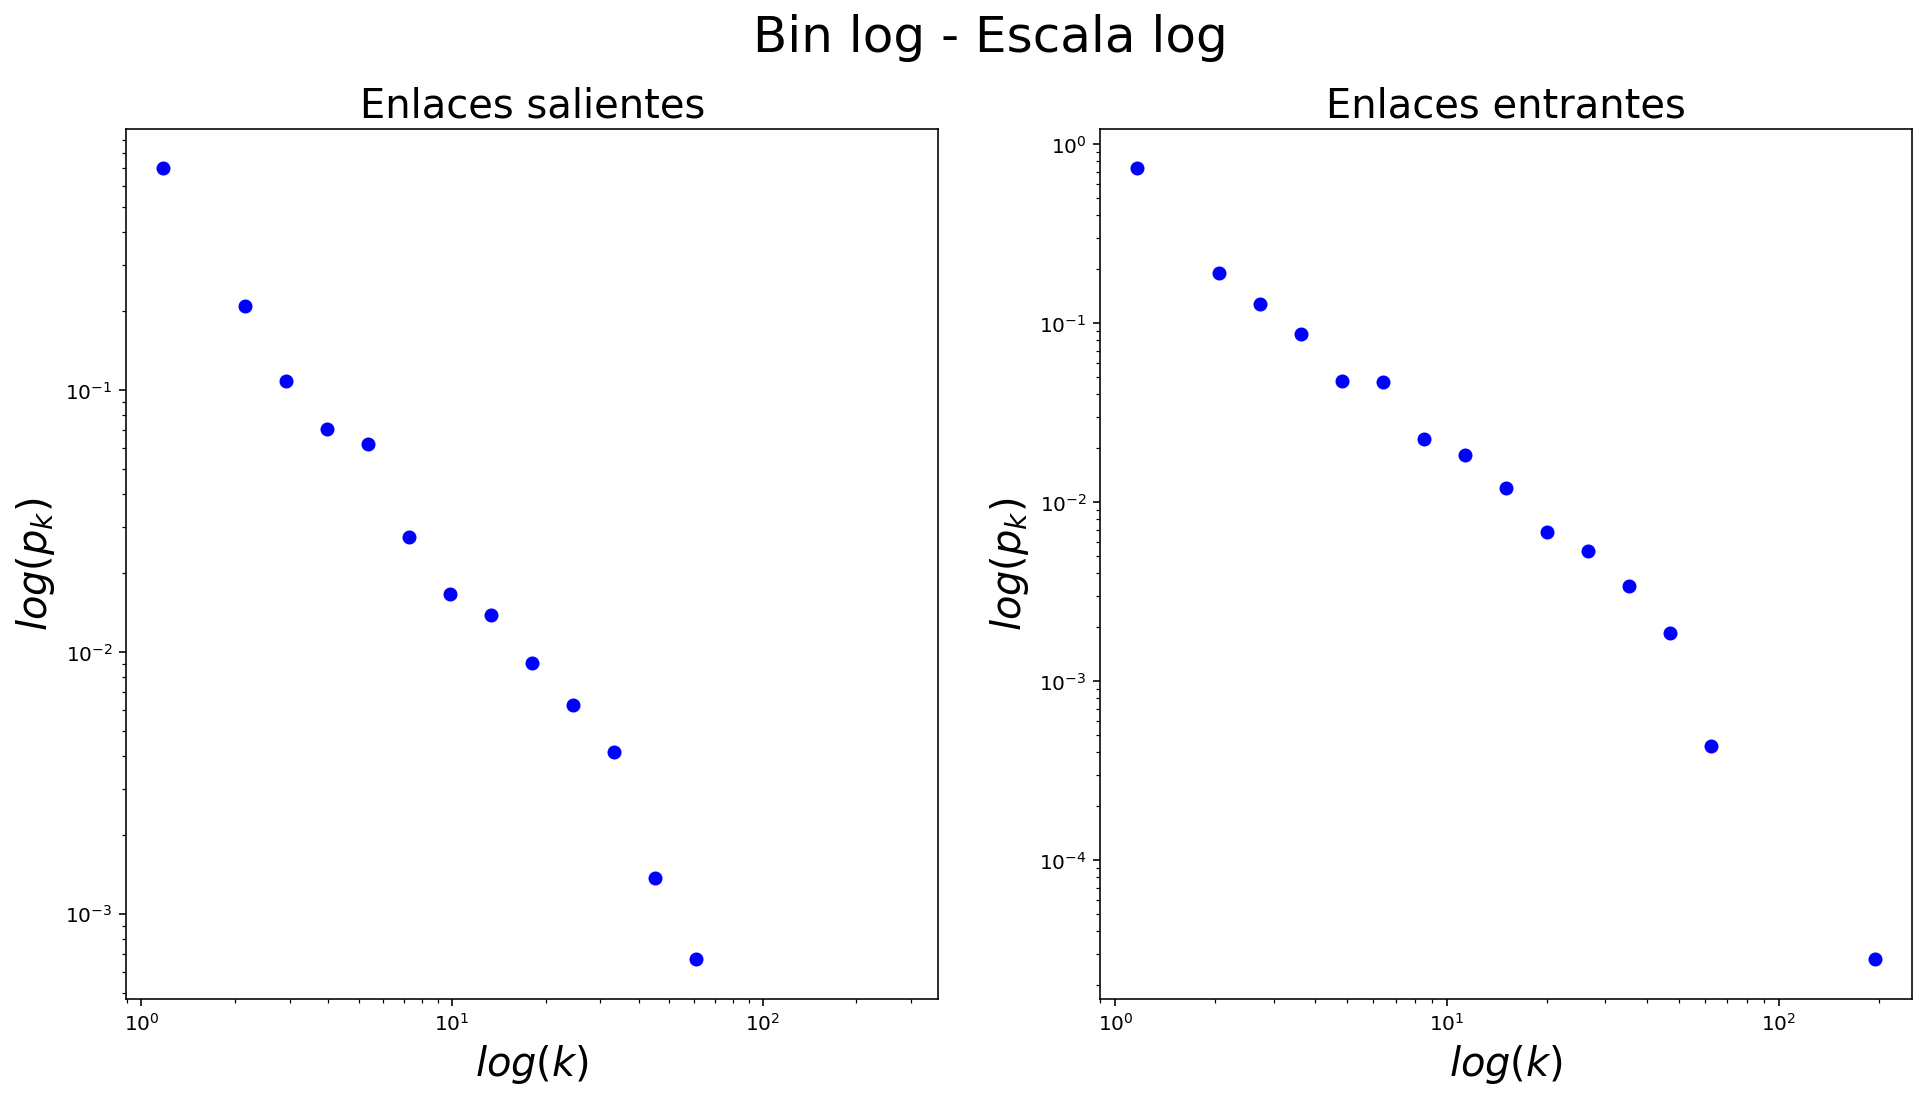

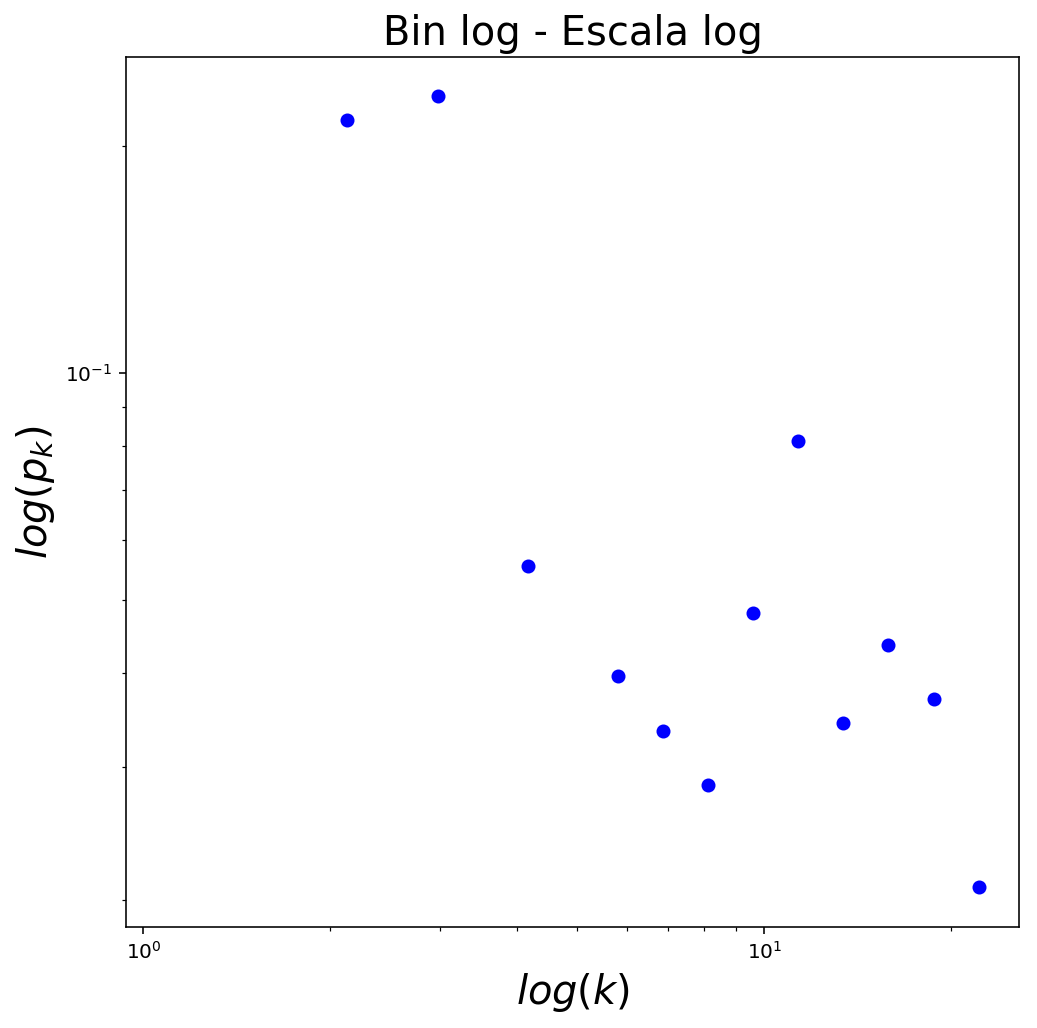

In [4]:
#---------------------------------------------------------------------
#Graficamos ambos grafos 

outfolder ='C:/Users/Lucio/Desktop/FACULTAD/Redes/datos/datosTPE/'

plt.figure(figsize=(16,16))
plt.suptitle('Mozart',fontsize=25)

plt.subplot(2, 1, 1)
plt.title('melodia',fontsize=15)
graficar(M,labels=False)

plt.subplot(2, 1, 2)
plt.title('ritmo',fontsize=15)
graficar(R,labels=False)

plt.savefig(outfolder+'Mozart'+'_grafico_M.png')
plt.show()

#---------------------------------------------------------------------
#Graficamos sus distribuciones de grados y creamos una tabla (son 2 por cada cancion en melodia y 1 por rítmica)
f_grado_dist_M(M)
#plt.savefig(outfolder+'Mozart'+'_distrib_m.png') No se porque no me los guarda
f_grado_dist_H(R)
#plt.savefig(outfolder+'Mozart'+'_distrib_r.png')

plt.show()

pd_m=f_tabla(M,'Mozart')
pd_r=f_tabla(R,'Mozart')
frames = [pd_m, pd_r]
result = pd.concat(frames)
print(result)
result.to_csv(outfolder+'Mozart')





In [64]:
def f_hierarchy(G):
    
    H=G.copy()
    #H = H.to_undirected()
    nodos=H.nodes() 
    grados=[]
    Cs=[]
    Cs_prom=[]
    Cs_error=[]
    cs_err=[]

    
    for i,nodo in enumerate(nodos):
        grados.append(H.degree(nodo))
        Cs.append(nx.clustering(H, nodo)) #sin pesos

    #Busco los Cs que tengan el mismo grado y los promedio    
    for i,k in enumerate(grados):
        ls=[]
        for j, c in enumerate(Cs):
            if k == grados[j]:
                ls.append(Cs[j])
        Cs_prom.append(np.mean(ls))
        Cs_error.append(np.std(ls))
        
        cs_err.append((1/np.log(10))*(1/Cs_prom[i])*Cs_error[i])
    
    
    plt.figure(figsize=(9,9))
    plt.plot(grados,Cs_prom,'bo')
    #plt.errorbar(grados, Cs_prom, xerr=None, yerr=Cs_error, ls='none')
    plt.errorbar(grados, Cs_prom, xerr=None, yerr=cs_err, fmt=' ',ecolor='green',elinewidth=5,capsize=5,markersize=3)
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('$k$')
    plt.ylabel('$C(k)$')
    plt.title('Bin lineal - Escala log')
    plt.show()
   

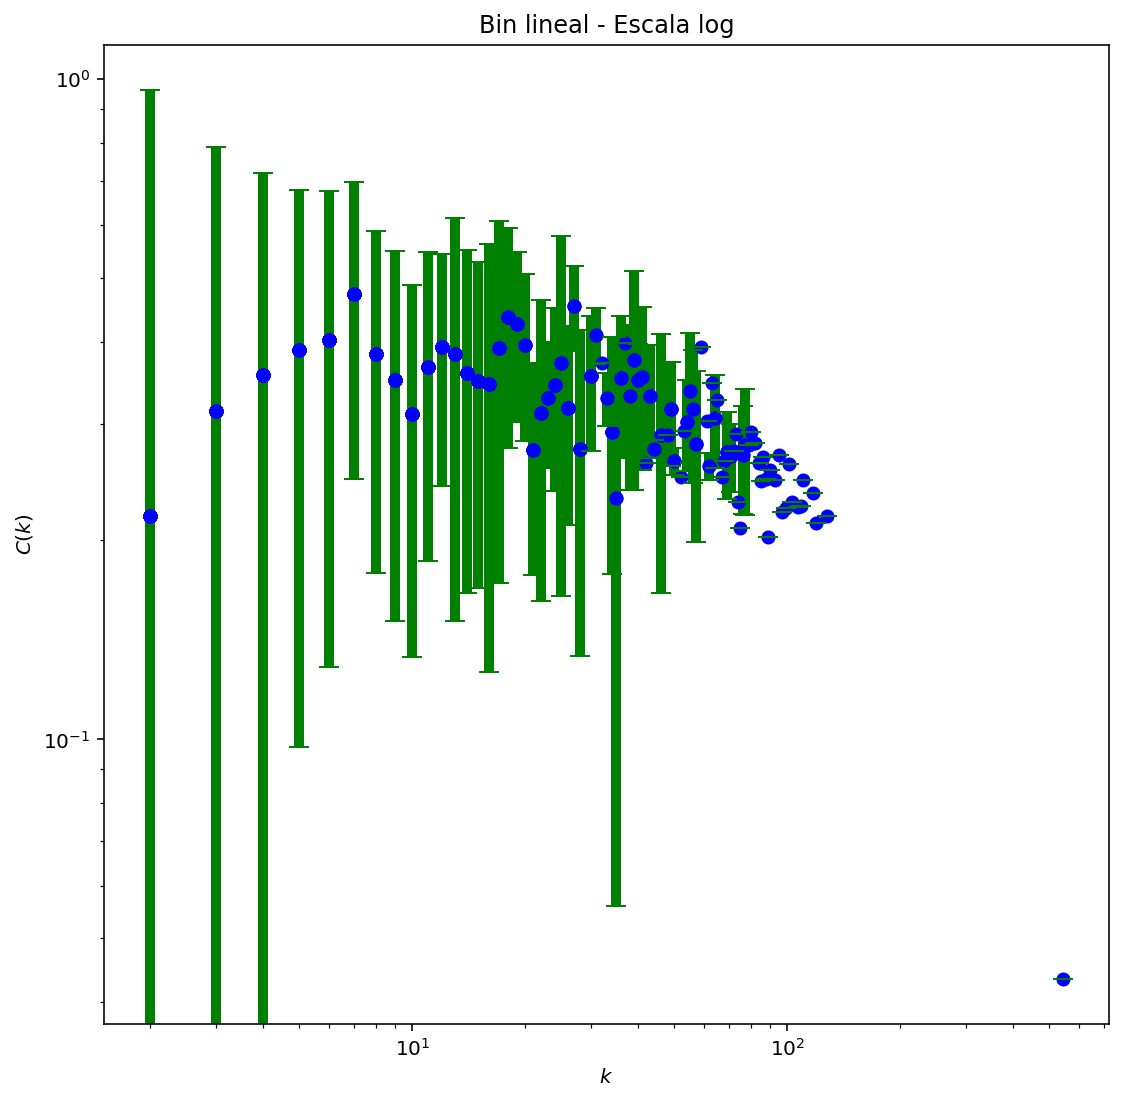

In [66]:
f_hierarchy(M)

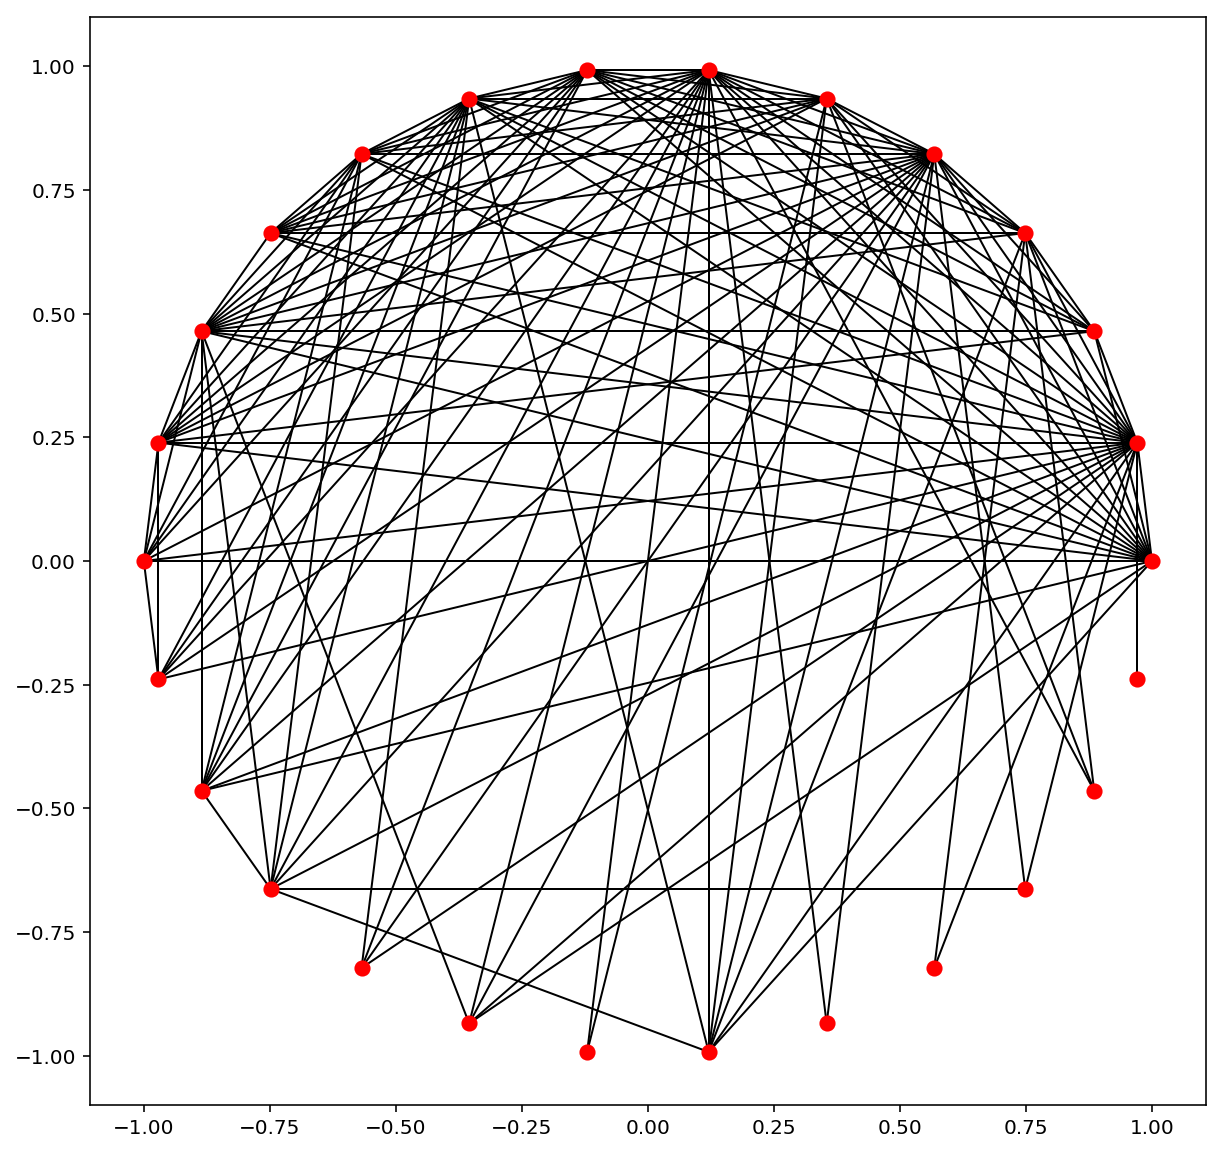

In [26]:
layouts=['random_layout','circular_layout','shell_layout','spring_layout','kamada_kawai_layout','spectral_layout']
# fruchterman reingold no está incluido porque es el algoritmo que usa spring
plt.figure(figsize=(10,10))
nx.draw_networkx(R,eval('nx.circular_layout')(R),
        width=1, 
        node_size=50,
        with_labels=False
       )

plt.show()

<Figure size 864x864 with 0 Axes>

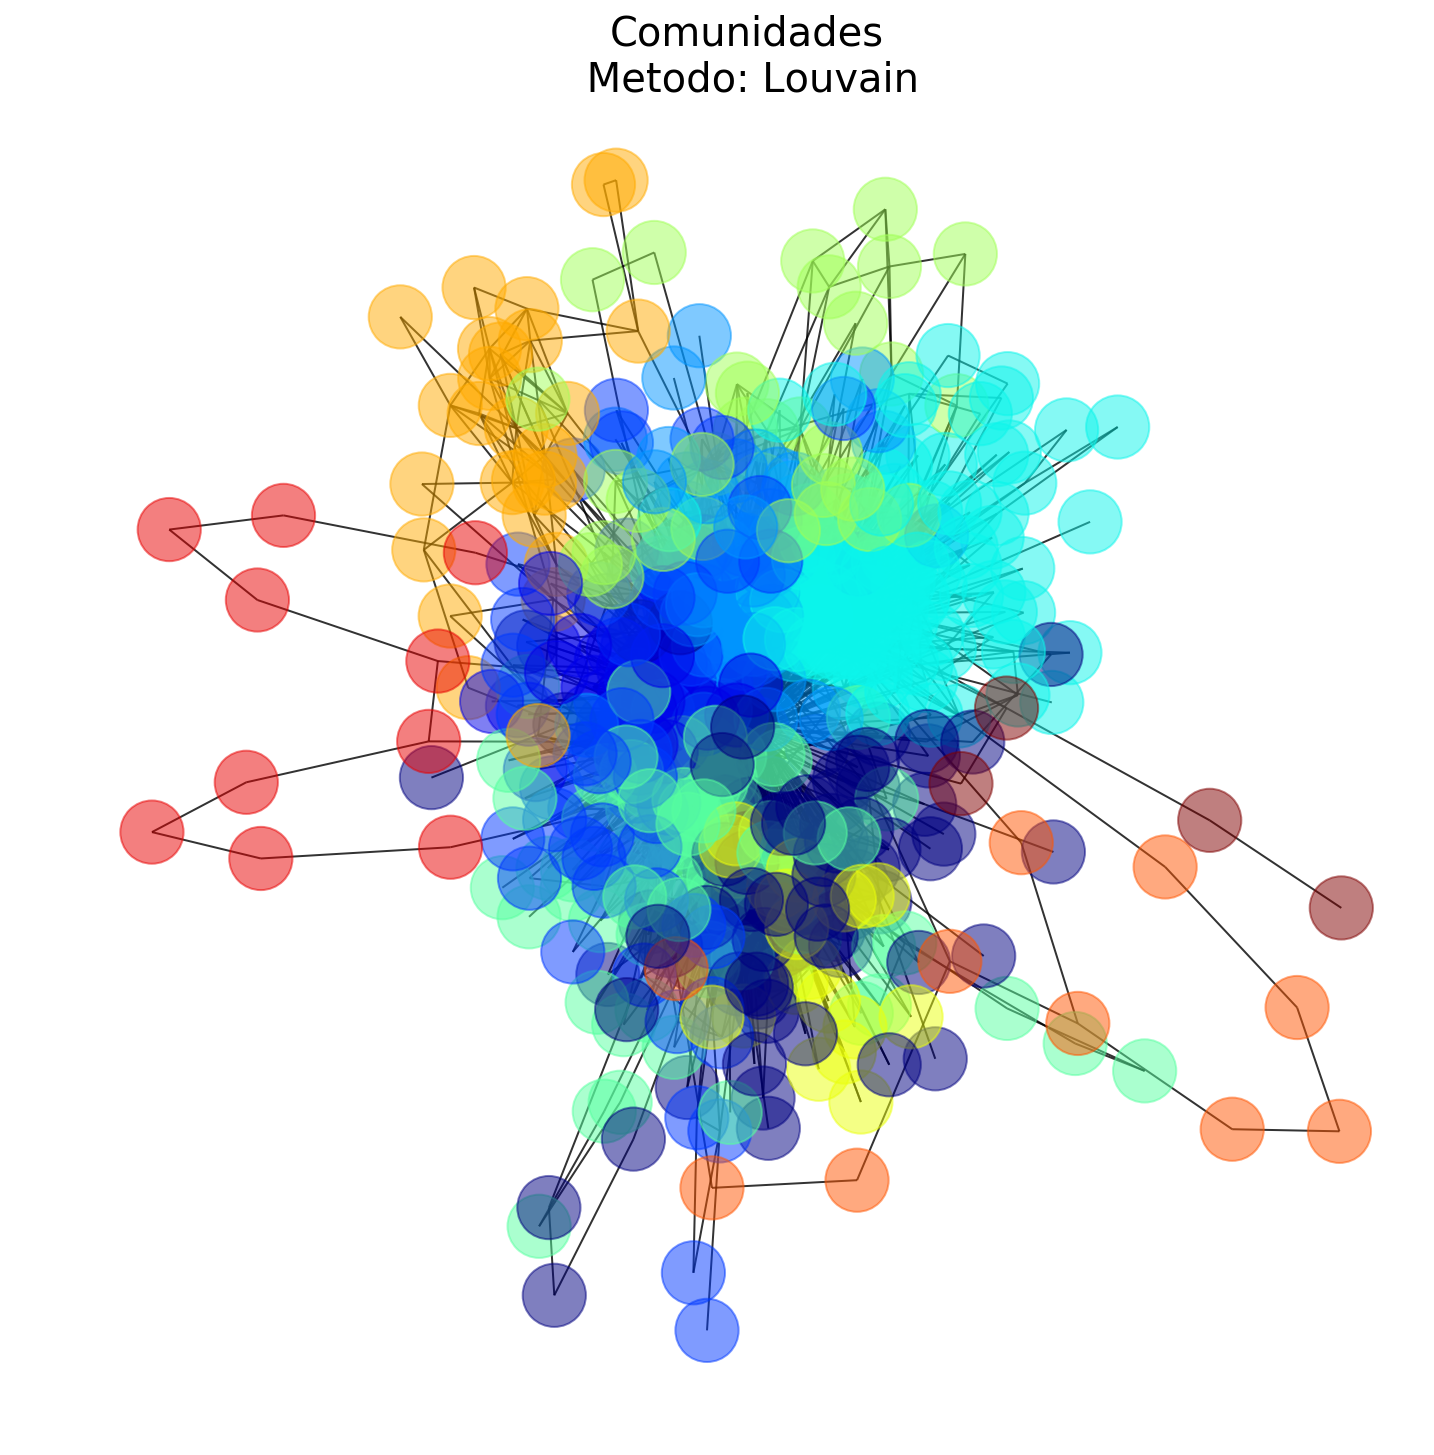

In [25]:
import community
#------------------------------------------------------------------------------------------------------
#Metodo: Louvain
#------------------------------------------------------------------------------------------------------
G=M.copy()
G = G.to_undirected()
part = community.best_partition(G) # diccionario con nodo - comunidad (nro)

width=12
height=12
fig=plt.figure(figsize=(width, height))
fig.patch.set_facecolor('white')
pos = nx.spring_layout(G)
#------------------------------------------------------------------------------------------------------
#Visualizo comunidades
#------------------------------------------------------------------------------------------------------
comunidades=list(part.values())#lista de comunidades desordenada y repetidas
L=len(comunidades)#cantidad de nodos
a=np.unique(comunidades)
l=len(a) #cantidad de comunidades
delfines = G.nodes()

colores_com = np.linspace(0,1,l) # quiero n colores
colores = [ cm.jet(x) for x in colores_com ] # transformo en colores del colormap que quiera

width=12
height=12
fig=plt.figure(figsize=(width, height))
fig.patch.set_facecolor('white')

nx.draw_networkx_nodes(G,pos,
                       node_color = [colores[g] for g in part.values()],
                       node_size=1000,
                       alpha=0.5,
                       labels=False)

nx.draw_networkx_edges(G,pos,width=1.0,
                       alpha=0.8)
#Etiquetas
#nx.draw_networkx_labels(G,pos,labels=None)
plt.title('Comunidades\n Metodo: Louvain',fontsize=20)
plt.axis('off')

plt.show()

In [ ]:
#-----------------------------------------------------------------------------
#Esto va a servir cuando no sea del music21


#Creo las listas de los grafos
#grafos_m = []
#grafos_r = []
#grafos_h1 = []
#grafos_h2 = []

#archivos = ['Mozart__Rondo_Ala_Turca', 'Chopin_-_Nocturne_Op_9_No_2_E_Flat_Major', 'Bach_Toccata_and_Fugue_in_D_Minor_Piano_solo',
#           'bachcelloprelude', 'queen_underpressure']
#for j,arc in enumerate(archivos):
#    grafos_m .append(f_xml2graph(r'.\\partituras\\'+arc+'.mxl',modelo='melodia'))
#    grafos_r.append(f_xml2graph(r'.\\partituras\\'+arc+'.mxl',modelo='ritmo'))
#    grafos_h2.append(f_armon (cancion, indexes))
#    grafos_h2.append(f_xml2graph_armonia (cancion, index)) 


#grafos_m .append(M)
#grafos_r.append(R)
#grafos_h1.append(H1)
#grafos_h2.append(H2) 